## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

### 比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [6]:
## 超參數設定
EPOCHS = 50
BATCH_SIZE = 256
LR = 0.001

momentum_list = [0.0, 0.1, 0.5, 0.8, 0.9, 0.99]

In [7]:
results = []
for nesterov in [False, True]:
    result = {}
    i_nesterov = int(nesterov)
    for momentum in momentum_list:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print(f"Experiment with momentum = {momentum} and nesterov = {nesterov}")
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LR, momentum=momentum, nesterov=nesterov)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = f"mo-{str(momentum)}"
        
        result[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}
    results.append(result)

Experiment with momentum = 0.0 and nesterov = False
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instruct

Epoch 48/50
50000/50000 [==============================] - 16s 319us/step - loss: 1.6960 - acc: 0.4072 - val_loss: 1.6969 - val_acc: 0.4083
Epoch 49/50
50000/50000 [==============================] - 16s 321us/step - loss: 1.6927 - acc: 0.4081 - val_loss: 1.6944 - val_acc: 0.4080
Epoch 50/50
50000/50000 [==============================] - 16s 320us/step - loss: 1.6895 - acc: 0.4085 - val_loss: 1.6907 - val_acc: 0.4084
Experiment with momentum = 0.1 and nesterov = False
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________


50000/50000 [==============================] - 16s 328us/step - loss: 1.6745 - acc: 0.4195 - val_loss: 1.6796 - val_acc: 0.4158
Epoch 49/50
50000/50000 [==============================] - 16s 320us/step - loss: 1.6711 - acc: 0.4209 - val_loss: 1.6759 - val_acc: 0.4162
Epoch 50/50
50000/50000 [==============================] - 16s 322us/step - loss: 1.6671 - acc: 0.4217 - val_loss: 1.6734 - val_acc: 0.4148
Experiment with momentum = 0.5 and nesterov = False
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer

Epoch 49/50
50000/50000 [==============================] - 16s 324us/step - loss: 1.5622 - acc: 0.4536 - val_loss: 1.5760 - val_acc: 0.4464
Epoch 50/50
50000/50000 [==============================] - 16s 322us/step - loss: 1.5581 - acc: 0.4557 - val_loss: 1.5736 - val_acc: 0.4479
Experiment with momentum = 0.8 and nesterov = False
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (

Epoch 50/50
50000/50000 [==============================] - 16s 322us/step - loss: 1.3408 - acc: 0.5333 - val_loss: 1.4181 - val_acc: 0.4958
Experiment with momentum = 0.9 and nesterov = False
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
______

Experiment with momentum = 0.99 and nesterov = False
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 17s 334us/step - loss: 2.2539 - acc: 0.1532 - val_loss: 2.2098 - val_acc: 0.1920
Epoch 2/50
50000/50000 [==============================] - 17s 336us/step - loss: 2.1787 - acc: 0.2211 - val_loss: 2.1492 - val_acc: 0.2352
Epoch 3/50
50000/50000 [==============================] - 18s 361us/step - loss: 2.1254 - acc: 0.2526 - val_loss: 2.1033 - val_acc: 0.2610
Epoch 4/50
50000/50000 [==============================] - 17s 338us/step - loss: 2.0818 - acc: 0.2734 - val_loss: 2.0627 - val_acc: 0.2771
Epoch 5/50
50000/50000 [==============================] - 16s 329us/step - loss: 2.0434 - acc: 0.2895 - val_loss: 2.0273 - val_acc: 0.2931
Epoch 6/50
50000/50000 [==============================] - 16s 330us/step - loss: 2.0097 - acc: 0.3025 - val_loss: 1.9965 - val_acc: 0.3052
Epoch 7/50
50000/50000 [==============================] - 16s 329us/step - loss: 1.9808 - acc: 0.3122 - val_loss: 1.

50000/50000 [==============================] - 17s 335us/step - loss: 2.2647 - acc: 0.1594 - val_loss: 2.2120 - val_acc: 0.2134
Epoch 2/50
50000/50000 [==============================] - 16s 327us/step - loss: 2.1738 - acc: 0.2335 - val_loss: 2.1373 - val_acc: 0.2582
Epoch 3/50
50000/50000 [==============================] - 16s 329us/step - loss: 2.1083 - acc: 0.2665 - val_loss: 2.0805 - val_acc: 0.2775
Epoch 4/50
50000/50000 [==============================] - 16s 328us/step - loss: 2.0578 - acc: 0.2846 - val_loss: 2.0352 - val_acc: 0.2968
Epoch 5/50
50000/50000 [==============================] - 16s 328us/step - loss: 2.0170 - acc: 0.2979 - val_loss: 1.9988 - val_acc: 0.3050
Epoch 6/50
50000/50000 [==============================] - 16s 329us/step - loss: 1.9834 - acc: 0.3082 - val_loss: 1.9687 - val_acc: 0.3156
Epoch 7/50
50000/50000 [==============================] - 16s 329us/step - loss: 1.9553 - acc: 0.3172 - val_loss: 1.9428 - val_acc: 0.3267
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 16s 329us/step - loss: 2.1237 - acc: 0.2540 - val_loss: 2.0848 - val_acc: 0.2765
Epoch 3/50
50000/50000 [==============================] - 16s 329us/step - loss: 2.0476 - acc: 0.2783 - val_loss: 2.0203 - val_acc: 0.2875
Epoch 4/50
50000/50000 [==============================] - 16s 328us/step - loss: 1.9930 - acc: 0.2995 - val_loss: 1.9721 - val_acc: 0.3131
Epoch 5/50
50000/50000 [==============================] - 17s 332us/step - loss: 1.9516 - acc: 0.3176 - val_loss: 1.9370 - val_acc: 0.3215
Epoch 6/50
50000/50000 [==============================] - 16s 328us/step - loss: 1.9187 - acc: 0.3299 - val_loss: 1.9075 - val_acc: 0.3372
Epoch 7/50
50000/50000 [==============================] - 17s 338us/step - loss: 1.8917 - acc: 0.3407 - val_loss: 1.8836 - val_acc: 0.3471
Epoch 8/50
50000/50000 [==============================] - 17s 346us/step - loss: 1.8691 - acc: 0.3488 - val_loss: 1.8624 - val_acc: 0.3537
Epoch 9/50
50000/50000 [===

Epoch 3/50
50000/50000 [==============================] - 16s 328us/step - loss: 1.9103 - acc: 0.3300 - val_loss: 1.8856 - val_acc: 0.3434
Epoch 4/50
50000/50000 [==============================] - 16s 329us/step - loss: 1.8626 - acc: 0.3509 - val_loss: 1.8501 - val_acc: 0.3469
Epoch 5/50
50000/50000 [==============================] - 16s 328us/step - loss: 1.8261 - acc: 0.3656 - val_loss: 1.8149 - val_acc: 0.3629
Epoch 6/50
50000/50000 [==============================] - 16s 328us/step - loss: 1.7965 - acc: 0.3766 - val_loss: 1.7906 - val_acc: 0.3729
Epoch 7/50
50000/50000 [==============================] - 16s 329us/step - loss: 1.7707 - acc: 0.3847 - val_loss: 1.7645 - val_acc: 0.3863
Epoch 8/50
50000/50000 [==============================] - 17s 330us/step - loss: 1.7480 - acc: 0.3935 - val_loss: 1.7423 - val_acc: 0.3940
Epoch 9/50
50000/50000 [==============================] - 16s 330us/step - loss: 1.7271 - acc: 0.3999 - val_loss: 1.7249 - val_acc: 0.4034
Epoch 10/50
50000/50000 [==

Epoch 4/50
50000/50000 [==============================] - 16s 328us/step - loss: 1.7475 - acc: 0.3901 - val_loss: 1.7243 - val_acc: 0.3990
Epoch 5/50
50000/50000 [==============================] - 17s 330us/step - loss: 1.7088 - acc: 0.4042 - val_loss: 1.7023 - val_acc: 0.4058
Epoch 6/50
50000/50000 [==============================] - 16s 329us/step - loss: 1.6766 - acc: 0.4155 - val_loss: 1.6714 - val_acc: 0.4098
Epoch 7/50
50000/50000 [==============================] - 16s 328us/step - loss: 1.6489 - acc: 0.4244 - val_loss: 1.6393 - val_acc: 0.4267
Epoch 8/50
50000/50000 [==============================] - 16s 329us/step - loss: 1.6228 - acc: 0.4310 - val_loss: 1.6275 - val_acc: 0.4270
Epoch 9/50
50000/50000 [==============================] - 16s 330us/step - loss: 1.6002 - acc: 0.4403 - val_loss: 1.5993 - val_acc: 0.4406
Epoch 10/50
50000/50000 [==============================] - 16s 329us/step - loss: 1.5782 - acc: 0.4475 - val_loss: 1.5794 - val_acc: 0.4439
Epoch 11/50
50000/50000 [=

50000/50000 [==============================] - 17s 344us/step - loss: 1.5305 - acc: 0.4609 - val_loss: 1.5141 - val_acc: 0.4674
Epoch 5/50
50000/50000 [==============================] - 18s 356us/step - loss: 1.4665 - acc: 0.4834 - val_loss: 1.4695 - val_acc: 0.4779
Epoch 6/50
50000/50000 [==============================] - 17s 335us/step - loss: 1.4159 - acc: 0.5025 - val_loss: 1.4493 - val_acc: 0.4839
Epoch 7/50
50000/50000 [==============================] - 17s 346us/step - loss: 1.3720 - acc: 0.5164 - val_loss: 1.4177 - val_acc: 0.4963
Epoch 8/50
50000/50000 [==============================] - 17s 346us/step - loss: 1.3329 - acc: 0.5298 - val_loss: 1.4058 - val_acc: 0.5070
Epoch 9/50
50000/50000 [==============================] - 17s 337us/step - loss: 1.3073 - acc: 0.5375 - val_loss: 1.3856 - val_acc: 0.5047
Epoch 10/50
50000/50000 [==============================] - 17s 334us/step - loss: 1.2736 - acc: 0.5489 - val_loss: 1.3738 - val_acc: 0.5150
Epoch 11/50
50000/50000 [============

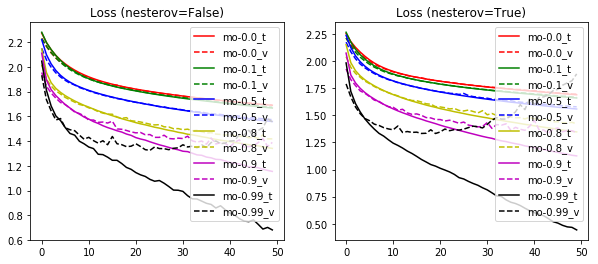

--------------------------------------------------------------------------------


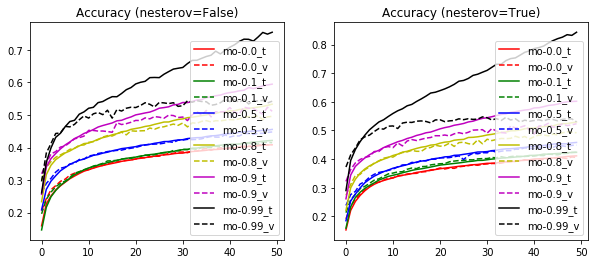

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
for i, cond in enumerate(results[0].keys()):
    ax1.plot(range(len(results[0][cond]['train-loss'])),results[0][cond]['train-loss'], '-', label=f'{cond}_t', color=color_bar[i])
    ax1.plot(range(len(results[0][cond]['valid-loss'])),results[0][cond]['valid-loss'], '--', label=f'{cond}_v', color=color_bar[i])
ax1.set_title("Loss (nesterov=False)")
ax1.legend()
for i, cond in enumerate(results[1].keys()):
    ax2.plot(range(len(results[1][cond]['train-loss'])),results[1][cond]['train-loss'], '-', label=f'{cond}_t', color=color_bar[i])
    ax2.plot(range(len(results[1][cond]['valid-loss'])),results[1][cond]['valid-loss'], '--', label=f'{cond}_v', color=color_bar[i])
ax2.set_title("Loss (nesterov=True)")
ax2.legend()

plt.show()

print('-'*80)

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(10, 4))
for i, cond in enumerate(results[0].keys()):
    ax3.plot(range(len(results[0][cond]['train-acc'])),results[0][cond]['train-acc'], '-', label=f'{cond}_t', color=color_bar[i])
    ax3.plot(range(len(results[0][cond]['valid-acc'])),results[0][cond]['valid-acc'], '--', label=f'{cond}_v', color=color_bar[i])
ax3.set_title("Accuracy (nesterov=False)")
ax3.legend()
for i, cond in enumerate(results[1].keys()):
    ax4.plot(range(len(results[1][cond]['train-acc'])),results[1][cond]['train-acc'], '-', label=f'{cond}_t', color=color_bar[i])
    ax4.plot(range(len(results[1][cond]['valid-acc'])),results[1][cond]['valid-acc'], '--', label=f'{cond}_v', color=color_bar[i])
ax4.set_title("Accuracy (nesterov=True)")
ax4.legend()

plt.show()